# Stack Exchange Tags Analysis
**In this project, I will discover one of the most popular programming Q&A webiste [Stack Exchange](https://stackexchange.com/), to find out what are
the most popular topics in today's world that programmers discuss about.**

### What kind of questions are welcome on this site?
On DSSE's help center's [section on questions](https://datascience.stackexchange.com/help/asking) , we can read that we should:

- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.
All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

- [Open Data](https://opendata.stackexchange.com/help/on-topic) (Dataset requests)
- [Computational Science](https://scicomp.stackexchange.com/help/on-topic) (Software packages and algorithms in applied mathematics)

### What information is available in each posts in Stack Exchange database?
Looking, just as an example, at this question, some of the information we see is:

For both questions and answers:
- The posts's score;
- The posts's title;
- The posts's author;
- The posts's body;
- For questions only:
- How many users have it on their "
- The last time the question as active;
- How many times the question was viewed;
- Related questions;
- The question's tags;
We will be extracting data from [Stack Exchange's Transact-SQL data base](https://data.stackexchange.com/datascience/query/new)

### Getting the data
Since we are going to analyse what tags(topics) are the most popular one amount programmers, we will be extracting useful information including ID, PostType, CreationgDate, Score, ViewCount, Tags, AnswerCount and FaoriteCount.

Getting the Data
To get the relevant data we run the following query.

<span style="color:blue">SELECT Id, CreationDate,
       <br>Score, ViewCount, Tags,</br>
       <br>AnswerCount, FavoriteCount</br>
 <br>FROM posts</br>
 <br>WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;</br></span>
Here's what the first few rows look like:

|	Id	|	CreationDate	|Score|	ViewCount|	Tags|	AnswerCount|	FavoriteCount|
|-------|-------------------|------|--------|-------|-----------|---------------------|
|	69589	|2020-03-12 16:07:52	|1	|26	|<machine-learning><feature-engineering><evalua...	|1	|NaN|
|	69590	|2020-03-12 16:09:33	|2	|173|<recommender-system><evaluation>	|2	|NaN
|	69591	|2020-03-12 16:24:04	|1	|10	|machine-learning><optimization>	|0	|NaN
|	69592	|2020-03-12 16:30:27	|1	|21	|<clustering><predictive-modeling><anomaly-dete...	|0	|NaN|
|	69594	|2020-03-12 17:01:34	|0	|59	|<classification><pca><tsne>	|2	|1.0|


## Exploring and Cleaning the data

In [16]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
#import extracted data
questions = pd.read_csv("2020 QueryResults.csv",parse_dates=["CreationDate"])
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,69589,2020-03-12 16:07:52,1,26,<machine-learning><feature-engineering><evalua...,1,NaN
1,69590,2020-03-12 16:09:33,2,173,<recommender-system><evaluation>,2,NaN
2,69591,2020-03-12 16:24:04,1,10,<machine-learning><optimization>,0,NaN
3,69592,2020-03-12 16:30:27,1,21,<clustering><predictive-modeling><anomaly-dete...,0,NaN
4,69594,2020-03-12 17:01:34,0,59,<classification><pca><tsne>,2,1.0


Since the ```FavoriteCount``` column contains Np.nan, we will start by fill the Nan value with 0

In [18]:
questions['FavoriteCount'].fillna(0, inplace=True)

In [19]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,69589,2020-03-12 16:07:52,1,26,<machine-learning><feature-engineering><evalua...,1,0.0
1,69590,2020-03-12 16:09:33,2,173,<recommender-system><evaluation>,2,0.0
2,69591,2020-03-12 16:24:04,1,10,<machine-learning><optimization>,0,0.0
3,69592,2020-03-12 16:30:27,1,21,<clustering><predictive-modeling><anomaly-dete...,0,0.0
4,69594,2020-03-12 17:01:34,0,59,<classification><pca><tsne>,2,1.0


In [20]:
#Check each column info
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7411 entries, 0 to 7410
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7411 non-null   int64         
 1   CreationDate   7411 non-null   datetime64[ns]
 2   Score          7411 non-null   int64         
 3   ViewCount      7411 non-null   int64         
 4   Tags           7411 non-null   object        
 5   AnswerCount    7411 non-null   int64         
 6   FavoriteCount  7411 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 405.4+ KB


We noticed that our Tags is an object instead of str, to make it easier to work with, we will change the datatype to ```str``` using ```astype```

In [21]:
#lowercase our column name
questions.columns=questions.columns.str.lower()
questions.head()

,id,creationdate,score,viewcount,tags,answercount,favoritecount
0,69589,2020-03-12 16:07:52,1,26,<machine-learning><feature-engineering><evalua...,1,0.0
1,69590,2020-03-12 16:09:33,2,173,<recommender-system><evaluation>,2,0.0
2,69591,2020-03-12 16:24:04,1,10,<machine-learning><optimization>,0,0.0
3,69592,2020-03-12 16:30:27,1,21,<clustering><predictive-modeling><anomaly-dete...,0,0.0
4,69594,2020-03-12 17:01:34,0,59,<classification><pca><tsne>,2,1.0


In [22]:
#Change tags data type to str
questions['tags']=questions['tags'].astype(str)

Now let's make our tags easier to analyse. The idea is to make each tag row into a list, which contains all the tags included in the posting, loop over each individul tags in the list to analyse the result

In [23]:
#The str.replace() replace all the "<",">" signs in the beginning and the end of each tag row, 
#the str.split() create a list inside the column and saperate each tags by "><"
questions['tags'] = questions['tags'].str.replace("^<|>$","").str.split("><")

In [24]:
questions.head()

,id,creationdate,score,viewcount,tags,answercount,favoritecount
0,69589,2020-03-12 16:07:52,1,26,"[machine-learning, feature-engineering, evalua...",1,0.0
1,69590,2020-03-12 16:09:33,2,173,"[recommender-system, evaluation]",2,0.0
2,69591,2020-03-12 16:24:04,1,10,"[machine-learning, optimization]",0,0.0
3,69592,2020-03-12 16:30:27,1,21,"[clustering, predictive-modeling, anomaly-dete...",0,0.0
4,69594,2020-03-12 17:01:34,0,59,"[classification, pca, tsne]",2,1.0


## Most Used and Most Viewed
Now, we already have our dataset ready, we start by analysing our tags by the most used and the most viewed

In [25]:
#Initiate an empty list for store tag_count
tag_count={}
# loop over the DataFrame for each row
for index,row in questions.iterrows():
    # for each tag inside each row of tags
    for i in row['tags']:
        if i in tag_count:
            tag_count[i]+=1
        else:
            tag_count[i]=1

#use tag_count dictionary to create an DataFrame
tag_count = pd.DataFrame.from_dict(tag_count,orient="index")
# reaname initiated column name to "count"
tag_count.rename(columns={0:"count"},inplace=True)
#pick 10 the most popular one
tag_count=tag_count.sort_values("count",ascending=False)
tag_count.head(10)

,count
machine-learning,2180
python,1395
deep-learning,1050
neural-network,862
keras,676
classification,631
tensorflow,568
nlp,509
scikit-learn,501
time-series,384


In [26]:
#initiate an empty dictionary for views
tag_view={}

for index,row in questions.iterrows():
    for i in row['tags']:
        if i in tag_view:
            tag_view[i]+=row['viewcount']
        else:
            tag_view[i]=row['viewcount']

tag_view=pd.DataFrame.from_dict(tag_view, orient="index")
tag_view.rename(columns={0:"view_count"}).sort_values("view_count",ascending=False).head(10)

,view_count
python,321741
machine-learning,313504
keras,188550
deep-learning,138751
tensorflow,134319
pandas,128972
scikit-learn,115602
neural-network,108786
nlp,85060
classification,75879


We can see that the most viewed and the most used tags are pretty similar, however it is not easy just to compare data using tables, next we will try to use data visualization to present our findnings

## Data Visulization

After creating view_count and use_count table, we will try to create a heatmap to present our findings

<br>Now let's create an table that gauge how pairs of tags are related to each other</br>

In [27]:
#We create a list where it contains all the unique tags
all_tags = list(tag_count.index)
#create an empty DataFrame in which all the index and columns are from all_tags
associations = pd.DataFrame(index=all_tags,columns=all_tags)
associations

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,nlp,scikit-learn,time-series,...,partial-dependence-plot,stacking,rbm,activity-recognition,homework,mean-shift,c++,generlized-advantaged-estimation,relational-dbms,surrogate
machine-learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deep-learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neural-network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mean-shift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generlized-advantaged-estimation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relational-dbms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before we fill in our data, we need to fill all the Nan value to 0

In [28]:
associations.fillna(0,inplace=True)
#loop over each row of tags, append 1 in the association table for all the index and columns that are in the same row of tags
for i in questions['tags']:
     associations.loc[i,i]+=1
#display 20 most popular tags 
associations=associations.loc[tag_count.index[:20],tag_count.index[:20]]

In [29]:
#Reverse the sequence of rows of the dataframe
associations=associations[::-1]
associations

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,nlp,scikit-learn,time-series,regression,cnn,lstm,dataset,pandas,statistics,clustering,r,predictive-modeling,feature-selection
feature-selection,73,28,14,15,2,8,0,5,20,2,9,1,3,6,6,9,5,4,6,193
predictive-modeling,91,39,16,10,2,28,3,2,10,26,25,1,5,11,4,21,7,5,205,6
r,54,26,3,13,6,12,2,6,1,11,17,0,3,11,1,14,15,221,5,4
clustering,57,54,6,2,0,19,3,12,22,10,5,0,0,6,2,4,244,15,7,5
statistics,90,31,17,8,1,15,3,5,7,18,19,0,2,14,4,252,4,14,21,9
pandas,24,165,0,2,3,2,0,8,30,14,3,0,2,20,269,4,2,1,4,6
dataset,86,36,30,20,10,24,14,15,10,18,12,7,2,306,20,14,6,11,11,6
lstm,72,41,82,56,93,9,38,22,0,80,9,17,308,2,2,2,0,3,5,3
cnn,82,36,132,84,78,21,53,5,3,12,5,351,17,7,0,0,0,0,1,1
regression,121,57,21,32,22,36,9,3,38,32,355,5,9,12,3,19,5,17,25,9


Now lets create a heatmap according to our table.

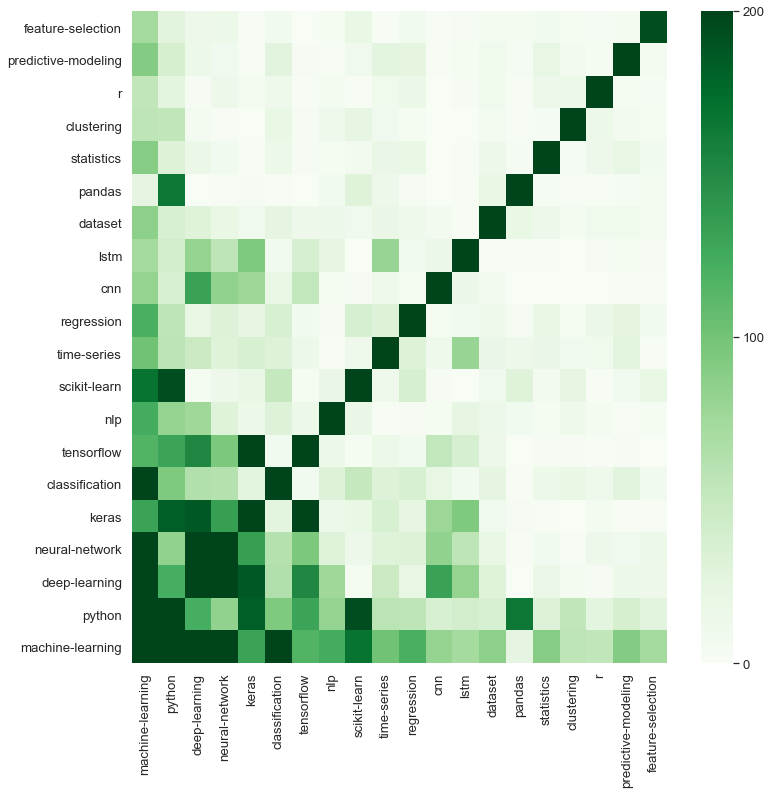

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(associations, cmap="Greens", annot=False, vmin=0, vmax=200)
sns.set(font_scale = 12)

## Result

According to the heat map, the darker the color the more those two tags are used together. 
- It is easy to see that machine-learnig, python, deeplearning, neuralnetwork are frequently used together and those are one of the most tags in Stack Exchange right now.
- We can also figure out that scikit-learn is one of the lbrary in Python that deal with machine learning models.
- One draw back for this visualization is that it only analyze the relation with 2 items,it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't. It would be better if we can use association rule mining-machine learning to analyze this problem.